In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm, trange

from rec.coding.samplers import ImportanceSampler

tf.config.experimental.set_visible_devices([], 'GPU')

# Importance Sampling Encoder and Decoder

In [8]:
target = tfd.Normal(loc=[-1.], scale=[0.3])
proposal = tfd.Normal(loc=[1.], scale=[1.1])

kl = tf.reduce_sum(tfd.kl_divergence(target, proposal))
print(f"KL between target and proposal: {kl:.4f}")

KL between target and proposal: 2.4894


In [9]:
s = ImportanceSampler(alpha=1.)

In [10]:
samps = []
indices = []

for i in trange(1000):
    ind, samp = s.coded_sample(target=target,
                               coder=proposal,
                               seed=i)
    
    samps.append(samp)
    indices.append(ind)
samps = tf.concat(samps, axis=0)

100%|██████████| 1000/1000 [00:04<00:00, 224.73it/s]


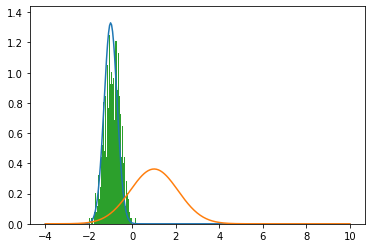

<tf.Tensor: shape=(), dtype=float32, numpy=3.5302515>

In [11]:
xs = tf.linspace(-4., 10., 300)

plt.plot(xs, target.prob(xs))
plt.plot(xs, proposal.prob(xs))
plt.hist(samps, bins=100, density=True)
plt.show()

tf.reduce_mean(tf.math.log(tf.cast(tf.stack(indices), tf.float32) + 1))

In [12]:
dec_samps = []

for i in trange(1000):
    dec_samp = s.decode_sample(coder=proposal,
                               sample_index=indices[i],
                               seed=i)
    dec_samps.append(dec_samp)
    
dec_samps = tf.concat(dec_samps, axis=0)

100%|██████████| 1000/1000 [00:01<00:00, 595.42it/s]


In [13]:
tf.reduce_sum(tf.abs(dec_samps - samps))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>